In [2]:
#Procesamiento acelerado por GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
#Ejemplo para ejecutar sin necesidad de sesion

from __future__ import absolute_import, division, print_function

import tensorflow as tf

#tf.enable_eager_execution()


In [4]:
#tf.executing_eagerly()

x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, Tensor("MatMul:0", shape=(1, 1), dtype=float32)


In [0]:
#A = tf.contrib.eager.Variable([[2.0]],dtype=tf.float32)
#B = tf.contrib.eager.Variable([[-1.0]], dtype=tf.float32)

#salida = tf.matmul(A,B)

In [0]:
#print(salida)

# Regresion Lineal

Con una regresion lineal lo que intentamos hacer es predecir el valor para 'y' o variable dependiente

## Librerias a importar

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


## Variables

In [0]:
W = tf.Variable([.01],dtype=tf.float32) #Weight = Peso
b = tf.Variable([.01],dtype=tf.float32) #bias = sesgo o tendencia

## Entradas y Salidas

In [0]:
x = tf.placeholder(tf.float32) #
y = tf.placeholder(tf.float32) #Placeholders o marcadores de posicion
reg_lineal = W * x +b  #Formula de la regresion lineal

## Costo

In [0]:
cost = tf.reduce_sum(tf.square(reg_lineal-y))  #Suma todos los elementos; existen otros metodos de reducion 
#El costo es igual a el error cuadrada de la suma de todos los errores que es la lista de regresion menos la lista de y que se tiene 

### Gradiente Descendiente
Lo que hace es minimizar el costo para que se aproxime a cero y ser mas precisa.

Lo que hace internamente es 

W: W - learning_rate * dcost/dW

b: b - learning_rate * dcost/db

In [0]:
op = tf.train.GradientDescentOptimizer(learning_rate=0.005) # Al learning_rate es la tasa de aprendizaje
# learning_rate puede tomar valores desde 0.1 y  valores muy pqueños como 0.0005 o 0.0001
train = op.minimize(cost) # Se busca es minimizar el costo

## Datos

In [0]:
X_data = [1,2,3,4,5,6,7]
Y_data = [-4.2,-0.9,2.1,5.5,7.7,11.9,12]
#La formula de Y es 3*X - 7 pero este tiene un margen de error pequeñp por eso no da exacto

### Inicializamos variables

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session() #Asignamos sesion
sess.run(init) #Se inicializan las variables sobre la sesion

## Entrenamiento

In [14]:
for i in range(1000): #Se entrenara durante 1000 epocas para reducir el costo
  _, cost_ = sess.run([train,cost],feed_dict={x:X_data,y:Y_data})
  if i % 100 == 0:
    print("Epoca",i,":",cost_)
    

    
    
#Imprimimos los valores ya ajustados de la session
W_, b_, cost_ = sess.run([W,b,cost],{x:X_data,y:Y_data})
print("""
Valores actuales:
W:{}, b:{}, cost:{}""".format(W_,b_,cost_))
print("""
reg_lineal        =   W * x + b  Formula de la regresion lineal
Mi hipostesis era     3 * x + (-7) con un leve error, 
Vemos que se ha aproximado mas por medio de la regresion lineal   """)

Epoca 0 : 393.0243
Epoca 100 : 8.817537
Epoca 200 : 4.75406
Epoca 300 : 4.4835696
Epoca 400 : 4.4655685
Epoca 500 : 4.464371
Epoca 600 : 4.4642878
Epoca 700 : 4.4642863
Epoca 800 : 4.4642873
Epoca 900 : 4.464285

Valores actuales:
W:[2.8499963], b:[-6.5285535], cost:4.464284896850586

reg_lineal        =   W * x + b  Formula de la regresion lineal
Mi hipostesis era     3 * x + (-7) con un leve error, 
Vemos que se ha aproximado mas por medio de la regresion lineal   


## Graficando

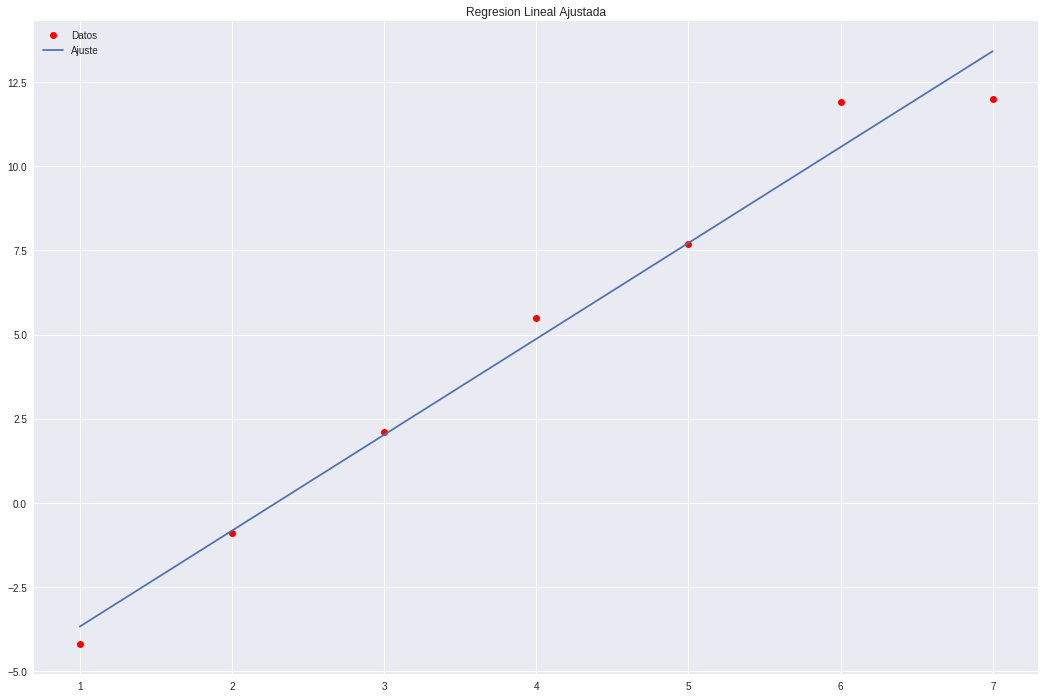

In [22]:
plt.figure(figsize=(18,12))
plt.plot(X_data,Y_data,'ro',label='Datos') #plot params coordenada x, coordenada y, color y forma, etiqueta
plt.plot(X_data,[W_ * Xi + b_ for Xi in X_data],label='Ajuste') # segundo param comprehension list
plt.title('Regresion Lineal Ajustada')
plt.legend()
plt.show()